In [1]:
import os
import sys
sys.path.append('../')
import io
import time
import json
import tensorflow as tf
from PIL import Image
import numpy as np
import multiprocessing
import concurrent.futures

import matplotlib.pyplot as plt

from utils.image_preprocessor import *
from TFRHelper import *

In [2]:
data_path = '/home/gabe/data-archive/kface/'

# Unzip the freaking monster

# Dataset

In [3]:
uids = os.listdir(data_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gabe/data-archive/kface/'

In [4]:
uids.remove('Low_Resolution.zip')

NameError: name 'uids' is not defined

In [5]:
def get_random_data():
    uid = np.random.choice(uids)
    accessary = np.random.choice(os.listdir(os.path.join(data_path, uid)))
    lighting = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary)))
    expression = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary, lighting)))
    fid = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary, lighting, expression)))
    
    fid = os.path.splitext(fid)[0]
    
    L1 = ['L1', 'L2', 'L8', 'L12', 'L16',' L19', 'L22', 'L25', 'L28']
    L3 = ['L3', 'L4', 'L5', 'L9', 'L13',' L17', 'L20', 'L23', 'L26', 'L29']
    L6 = ['L6', 'L7', 'L10', 'L11', 'L15',' L18', 'L21', 'L24', 'L27', 'L30']
    if lighting in L1:
        temp = 'L1'
    elif lighting in L3:
        temp = 'L3'
    elif lighting in L6:
        temp = 'L6'
    
    img_path = os.path.join(data_path, uid, accessary, lighting, expression, fid + '.jpg')
    txt_path = os.path.join(data_path, uid, 'S001', temp, expression, fid + '.txt')
    
    return img_path, txt_path

In [6]:
def parse_txt_data(txt_path):
    with open(txt_path, 'r') as txt:
        data = txt.read()
        txt.close()

    temp = data.split('\n')[:-1]
    temp = [np.array(x.split('\t')).astype(int) for x in temp]

    facial_landmarks = []
    bboxes = []

    for row in temp:
        if len(row) == 2:
            facial_landmarks.append(row)
        else:
            bboxes.append(row)
    """
    Facial Landmarks : [nose, right eye, left eye, mouth right corner, mouth left corner, right ear, left ear]
    Bounding Boxes : [face, right eye, left eye, nose, mouth, right ear, left ear]
    """
    
    return bboxes, facial_landmarks

In [7]:
uid = np.random.choice(uids)
accessary = np.random.choice(os.listdir(os.path.join(data_path, uid)))
lighting = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary)))
expression = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary, lighting)))
fid = np.random.choice(os.listdir(os.path.join(data_path, uid, accessary, lighting, expression)))

fid = os.path.splitext(fid)[0]

L1 = ['L1', 'L2', 'L8', 'L12', 'L16',' L19', 'L22', 'L25', 'L28']
L3 = ['L3', 'L4', 'L5', 'L9', 'L13',' L17', 'L20', 'L23', 'L26', 'L29']
L6 = ['L6', 'L7', 'L10', 'L11', 'L15',' L18', 'L21', 'L24', 'L27', 'L30']
if lighting in L1:
    source = 'L1'
elif lighting in L3:
    source = 'L3'
elif lighting in L6:
    source = 'L6'

img_path = os.path.join(data_path, uid, accessary, lighting, expression, fid + '.jpg')
txt_path = os.path.join(data_path, uid, 'S001', source, expression, fid + '.txt')

NameError: name 'uids' is not defined

/home/gabe/data-archive/kface/19083042/S001/L5/E01/C12.jpg


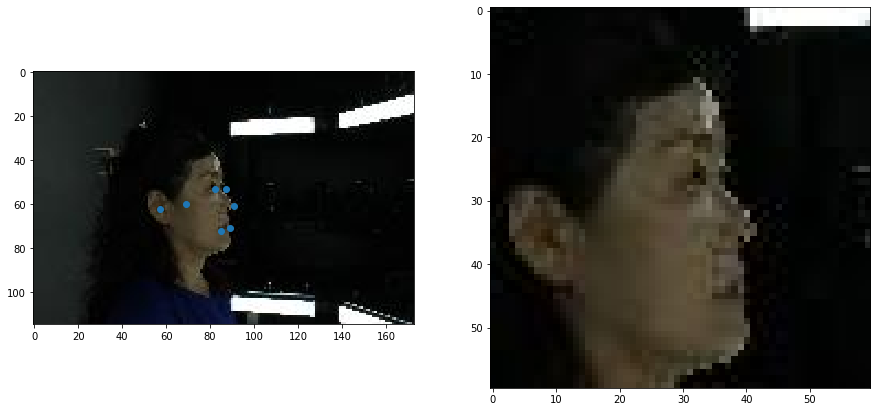

In [327]:
img_path, txt_path = get_random_data()
print(img_path)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

bboxes, facial_landmarks = parse_txt_data(txt_path)

x, y = np.transpose(facial_landmarks)
bbox = bboxes[0]
xmin, ymin, width, height = bbox

fig, axes = plt.subplots(1, 2, figsize=(15,15))


# cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), color=(0, 255, 0))
axes[0].imshow(img)
axes[0].scatter(x, y)

cropped = img[ymin : ymin + height, xmin : xmin + width]
axes[1].imshow(cropped)